# Interact Exercise 3

## Imports

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.display import display

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Using interact for animation with data

A [*soliton*](http://en.wikipedia.org/wiki/Soliton) is a constant velocity wave that maintains its shape as it propagates. They arise from non-linear wave equations, such has the [Korteweg–de Vries](http://en.wikipedia.org/wiki/Korteweg%E2%80%93de_Vries_equation) equation, which has the following analytical solution:

$$
\phi(x,t) = \frac{1}{2} c \mathrm{sech}^2 \left[ \frac{\sqrt{c}}{2} \left(x - ct - a \right) \right]
$$

The constant `c` is the velocity and the constant `a` is the initial location of the soliton.

Define `soliton(x, t, c, a)` function that computes the value of the soliton wave for the given arguments. Your function should work when the postion `x` *or* `t` are NumPy arrays, in which case it should return a NumPy array itself.

In [4]:
from math import sqrt

In [27]:
def soliton(x, t, c, a):
    # make x and t arrays (if not already)
    if type(t) != np.ndarray:
        t = np.array([t])
    if type(x) != np.ndarray:
        x = np.array([x])
        
    #set "xct" to x-ct
    #because x and t are both arrays, use the sum of meshgid to "add" them without worrying about array size
    #this will givs us a 1D array if T or X is a single element array
    xct = sum(np.meshgrid(-1*c*t, x))
    
    #set a to be the same array size as xct
    a = a*np.ones_like(xct)
    
    # z is the array that represents the bracketed expression
    z = (sqrt(c))/2*(xct-a)
    
    # sech = 2/e**z + e**-z use np.exp to input each element
    sech2z = (2/(np.exp(z) + np.exp(-z)))**2
    answer = 1/2*c*sech2z
    return(answer)

In [28]:
assert np.allclose(soliton(np.array([0]),0.0,1.0,0.0), np.array([0.5]))

To create an animation of a soliton propagating in time, we are going to precompute the soliton data and store it in a 2d array. To set this up, we create the following variables and arrays:

In [29]:
tmin = 0.0
tmax = 10.0
tpoints = 100
t = np.linspace(tmin, tmax, tpoints) 

xmin = 0.0
xmax = 10.0
xpoints = 200
x = np.linspace(xmin, xmax, xpoints)

c = 1.0
a = 0.0

Compute a 2d NumPy array called `phi`:

* It should have a dtype of `float`.
* It should have a shape of `(xpoints, tpoints)`.
* `phi[i,j]` should contain the value $\phi(x[i],t[j])$.

In [30]:
phi = soliton(x, t, c, a) 
phi.shape

(200, 100)

In [31]:
assert phi.shape==(xpoints, tpoints)
assert phi.ndim==2
assert phi.dtype==np.dtype(float)
assert phi[0,0]==soliton(x[0],t[0],c,a) 

Write a `plot_soliton_data(i)` function that plots the soliton wave $\phi(x, t[i])$. Customize your plot to make it effective and beautiful.

In [34]:
def plot_soliton_data(i=0):
    #set the t to vary with [i]
    #note t is set at 0 (i=0) so this plot is a graph of Phi v X with t=0 
    plt.plot(x, soliton(x, t[i], c, a))
    
    #Graph styling
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xlabel("X", fontsize = 14)
    plt.ylabel(r'$\phi$ (x, %s)' %(t[i]), fontsize = 16)
    plt.title("Korteweg de Vries Equation", fontsize = 16)
    

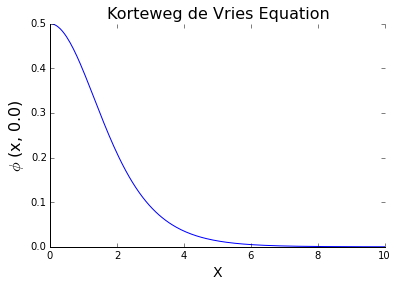

In [35]:
plot_soliton_data(0)

In [36]:
assert True # leave this for grading the plot_soliton_data function

Use `interact` to animate the `plot_soliton_data` function versus time.

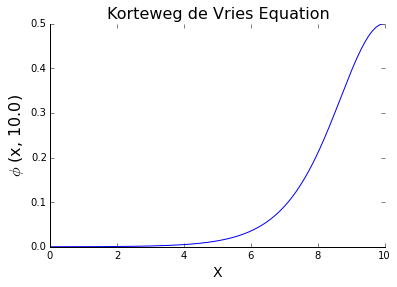

In [37]:
interact(plot_soliton_data, i=(0,99));

In [45]:
assert True # leave this for grading the interact with plot_soliton_data cell